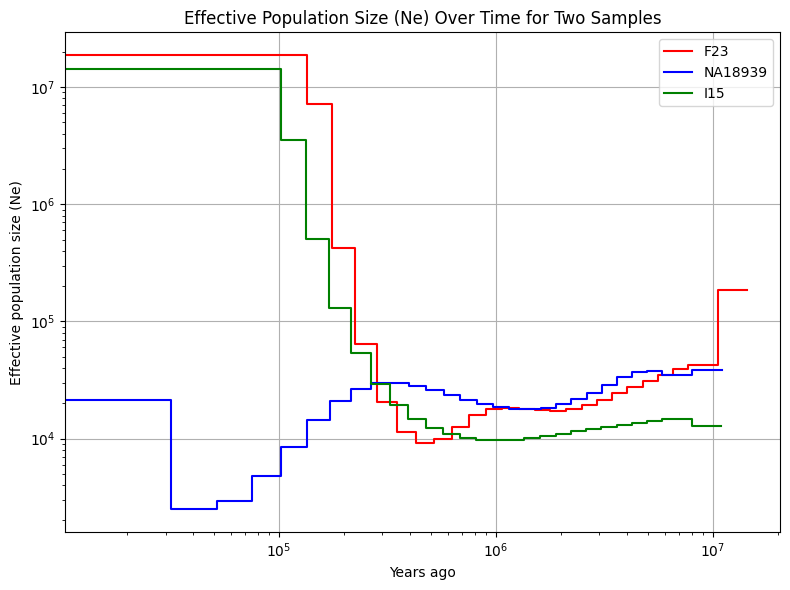

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for the mutation rate and generation time
mu = 1.25e-8
gen = 30

# Function to read and process MSMC2 data
def process_msmc2_data(file_path):
    df = pd.read_csv(file_path, delimiter='\t')
    df['Years_ago'] = df['left_time_boundary'] / mu * gen
    df['Ne'] = (1 / df['lambda']) / (2 * mu)
    return df


def return_df(sample_name):
    file_path = f'/home/mkato/hdd_data/data/2-msmc/{sample_name}/effective_population_size_file/{sample_name}.msmc2.final.txt'
    return process_msmc2_data(file_path)
# Read and process the data
df1 = return_df('F23')
df2 = return_df('NA18939_updated')
df3 = return_df('I15')

# Plotting both datasets on the same graph
plt.figure(figsize=(8, 6))
plt.step(df1['Years_ago'], df1['Ne'], where='post', color='red', label='F23')
plt.step(df2['Years_ago'], df2['Ne'], where='post', color='blue', label='NA18939')
plt.step(df3['Years_ago'], df3['Ne'], where='post', color='green', label='I15')

# Set log scale for both axes and axis limits
plt.xscale('log')
plt.yscale('log')
#plt.xlim(10**4, 10**6)
#plt.ylim(10**3, 10**5)

# Adding labels and title
plt.xlabel('Years ago')
plt.ylabel('Effective population size (Ne)')
plt.title('Effective Population Size (Ne) Over Time for Two Samples')

# Adding the legend
plt.legend(loc='upper right')

# Show the grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()
